# Data Overview — Fraud Detection Project 

This notebook gives a **project content** overview of both fraud datasets used in the pipeline.

## Objectives
1. Load e-commerce and credit card fraud data using shared project constants (`src`)
2. Report shape, columns, and class distribution for both datasets
3. Save overview plots (class balance) for presentation

In [5]:
import sys
!{sys.executable} -m pip install pandas matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

import sys
sys.path.insert(0, str(Path().resolve().parent))
from src import (
    ECOMMERCE_RAW_FILE,
    CREDITCARD_RAW_FILE,
    ECOMMERCE_TARGET_COLUMN,
    CREDITCARD_TARGET_COLUMN,
)

project_root = Path().resolve()
if project_root.name == 'notebooks':
    project_root = project_root.parent
else:
    current = Path().resolve()
    while current != current.parent:
        if (current / 'data').exists():
            project_root = current
            break
        current = current.parent

DATA_DIR = project_root / 'data' / 'raw'
OUTPUT_DIR = project_root / 'outputs' / 'eda' / 'overview'
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

def save_plot(fig, filename, dpi=300, bbox_inches='tight'):
    filepath = OUTPUT_DIR / filename
    fig.savefig(filepath, dpi=dpi, bbox_inches=bbox_inches)
    rel = filepath.relative_to(project_root)
    print(f"Plot saved to: {rel}")

print(f"Data directory: {DATA_DIR.relative_to(project_root)}")
print(f"Output directory: {OUTPUT_DIR.relative_to(project_root)}")

Data directory: data/raw
Output directory: outputs/eda/overview


## 1. E-commerce fraud data (Fraud_Data.csv)

In [ ]:
ecom_path = DATA_DIR / ECOMMERCE_RAW_FILE
ecom = pd.read_csv(ecom_path) if ecom_path.exists() else pd.DataFrame()
print(f"Shape: {ecom.shape}")
print(f"Columns: {ecom.columns.tolist()}")
# if ECOMMERCE_TARGET_COLUMN in ecom.columns:
#     print(ecom[ECOMMERCE_TARGET_COLUMN].value_counts())
# ecom.head()

Shape: (151112, 11)
Columns: ['user_id', 'signup_time', 'purchase_time', 'purchase_value', 'device_id', 'source', 'browser', 'sex', 'age', 'ip_address', 'class']
class
0    136961
1     14151
Name: count, dtype: int64


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0


## 2. Credit card fraud data (creditcard.csv)

In [7]:
cc_path = DATA_DIR / CREDITCARD_RAW_FILE
cc = pd.read_csv(cc_path) if cc_path.exists() else pd.DataFrame()
print(f"Shape: {cc.shape}")
print(f"Columns: {cc.columns.tolist()}")
if CREDITCARD_TARGET_COLUMN in cc.columns:
    print(cc[CREDITCARD_TARGET_COLUMN].value_counts())
cc.head()

Shape: (284807, 31)
Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']
Class
0    284315
1       492
Name: count, dtype: int64


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3. Class balance overview (both datasets)

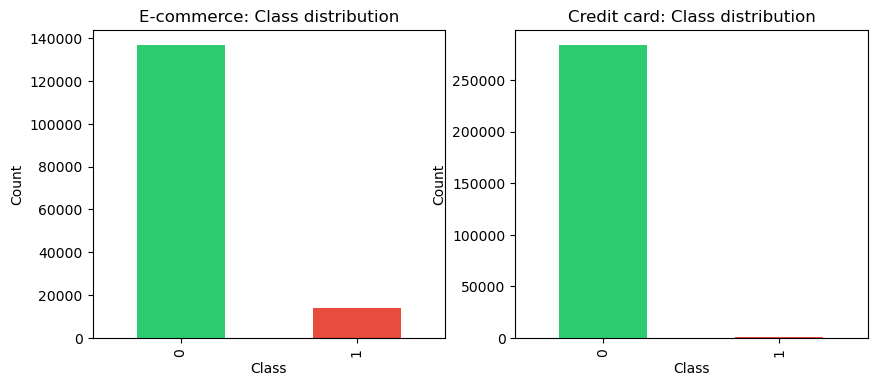

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

if ECOMMERCE_TARGET_COLUMN in ecom.columns:
    ecom[ECOMMERCE_TARGET_COLUMN].value_counts().sort_index().plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'])
    axes[0].set_title('E-commerce: Class distribution')
    axes[0].set_xlabel('Class')
    axes[0].set_ylabel('Count')

if CREDITCARD_TARGET_COLUMN in cc.columns:
    cc[CREDITCARD_TARGET_COLUMN].value_counts().sort_index().plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'])
    axes[1].set_title('Credit card: Class distribution')
    axes[1].set_xlabel('Class')
    axes[1].set_ylabel('Count')

plt.tight_layout()
save_plot(fig, 'overview_class_balance_both_datasets.png')
plt.show()